#### Visualize census tract data

In [1]:
import numpy as np
import pandas as pd
import dask.dataframe as dd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# with dask

census_tract_df = dd.read_csv("../census_outputs/census_tract_2020.csv")

In [3]:
# show first 5 rows of first partition

census_tract_df.head()

,geo_id,tract_name,state_name,state_code,county,tract,variable_name,value,measurement,demographic_target,demographic
0,1400000US01073003600,"Census Tract 36, Jefferson County, Alabama",Alabama,1,73,3600,Estimate!!HOUSEHOLDS BY TYPE!!Total households,2019,estimate,households by type,total households
1,1400000US01073003600,"Census Tract 36, Jefferson County, Alabama",Alabama,1,73,3600,Annotation of Estimate!!HOUSEHOLDS BY TYPE!!To...,0,annotation of estimate,households by type,total households
2,1400000US01073003600,"Census Tract 36, Jefferson County, Alabama",Alabama,1,73,3600,Margin of Error!!HOUSEHOLDS BY TYPE!!Total hou...,408,margin of error,households by type,total households
3,1400000US01073003600,"Census Tract 36, Jefferson County, Alabama",Alabama,1,73,3600,Annotation of Margin of Error!!HOUSEHOLDS BY T...,0,annotation of margin of error,households by type,total households
4,1400000US01073003600,"Census Tract 36, Jefferson County, Alabama",Alabama,1,73,3600,Percent!!HOUSEHOLDS BY TYPE!!Total households,2019,percent,households by type,total households


In [4]:
# show number of partitions

census_tract_df.npartitions

911

In [5]:
# Get information about DataFrame

census_tract_df.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 11 entries, geo_id to demographic
dtypes: object(8), int64(3)

In [6]:
# show column names

census_tract_df.columns

Index(['geo_id', 'tract_name', 'state_name', 'state_code', 'county', 'tract',
       'variable_name', 'value', 'measurement', 'demographic_target',
       'demographic'],
      dtype='object')

In [8]:
# census tract count by state

state_tract_count = census_tract_df.groupby("state_name").size().reset_index().rename(columns = {0: "n"}).sort_values("n", ascending = False).compute()

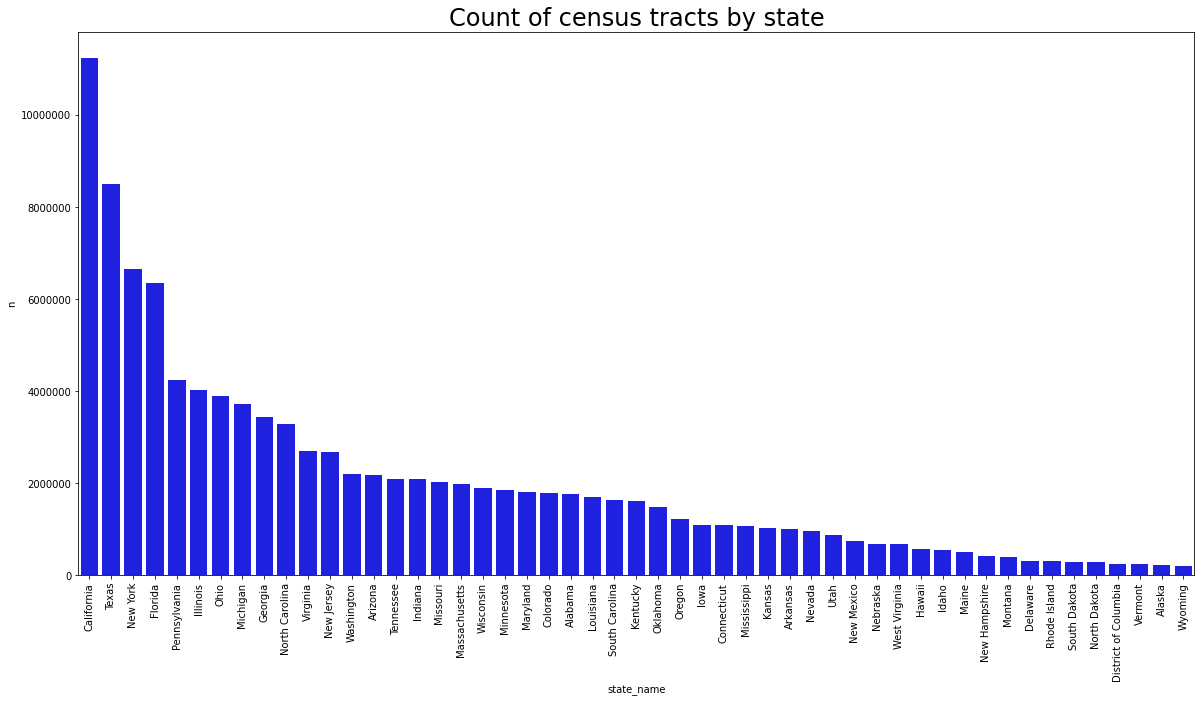

In [16]:
fig, ax = plt.subplots(figsize = (20, 10))

ax.get_yaxis().get_major_formatter().set_scientific(False)

plt.xticks(rotation = 90)

plt.title("Count of census tracts by state", fontsize = 24)

sns.barplot(data = state_tract_count, x= "state_name", y= "n", color= "b")

plt.show()

In [17]:
# find non integer values & replace with 0

census_tract_df["value"] = dd.to_numeric(census_tract_df.value.astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)

In [18]:
# remove rows with zero or negative values

census_tract_df = census_tract_df.loc[census_tract_df["value"] > 0]

In [22]:
# look more into the following demographics:
#  - marital status
#  - fertility
#  - educational attainment
#  - residence 1 year ago
#  - computers and internet use
#  - u.s. citizenship status